In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_words = 10000
max_comment_len = 50

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

In [5]:
comments = train['comment_text']

In [6]:
comments[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [7]:
y_train = train[['toxic', 'severe_toxic', 'obscene',	'threat',	'insult',	'identity_hate']]

In [8]:
tokenizer = Tokenizer(num_words=num_words)

In [9]:
tokenizer.fit_on_texts(comments)

In [10]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

In [11]:
sequences = tokenizer.texts_to_sequences(comments)

In [12]:
x_train = pad_sequences(sequences, maxlen=max_comment_len)

In [13]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(LSTM(40))
model_lstm.add(Dense(6, activation='sigmoid'))

In [14]:
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'AUC'])

In [15]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            27040     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 1,320,246
Trainable params: 1,320,246
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                           monitor='val_accuracy',
                                           save_best_only=True,
                                           verbose=1)

In [38]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=512,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
250/250 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.9851 - auc: 0.7090
Epoch 00001: val_accuracy improved from -inf to 0.99326, saving model to best_model_lstm.h5
250/250 [==============================] - 35s 138ms/step - loss: 0.1725 - accuracy: 0.9851 - auc: 0.7090 - val_loss: 0.1311 - val_accuracy: 0.9933 - val_auc: 0.8426
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.9907 - auc: 0.9550
Epoch 00002: val_accuracy improved from 0.99326 to 0.99411, saving model to best_model_lstm.h5
250/250 [==============================] - 34s 136ms/step - loss: 0.0775 - accuracy: 0.9907 - auc: 0.9550 - val_loss: 0.0584 - val_accuracy: 0.9941 - val_auc: 0.9719
Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9941 - auc: 0.9755
Epoch 00003: val_accuracy did not improve from 0.99411
250/250 [=========

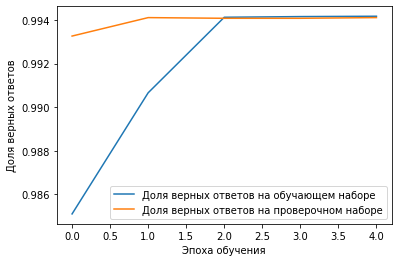

In [39]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [16]:
test_comments = pd.read_csv('test.csv')

In [20]:
test_comments[:1]

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...

In [27]:
test_comments['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [28]:
test_labels = pd.read_csv('test_labels.csv')

In [30]:
test_labels.head()

id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [31]:
test_full = pd.merge(test_comments, test_labels, on='id')

In [32]:
test_full

id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0          -1            -1       -1      -1      -1             -1  
1          -1            -1       -1      -1      -1             -1  
2          -1            -1       -1      -1      -1             -1  
3          -1            -1       -1      -1      -1             -1  
4          -1            -1       -1      -1      -1             -1  
...       ...           ...      ...     ...     ...            ...  
153159     -1            -1       -1      -1      -1             -1  
153160     -1            -1       -1      -1      -1             -1  
153161     -1            -1       -1      -1      -1             -1  
153162     -1            -1       -1      -1      -1             -1  
153163     -1            -1       -1      -1      -1             -1  

[153164 rows x 8 columns]

In [33]:
test = test_full[test_full['toxic']!=-1]

In [34]:
test

id                                       comment_text  \
5       0001ea8717f6de06  Thank you for understanding. I think very high...   
7       000247e83dcc1211                   :Dear god this site is horrible.   
11      0002f87b16116a7f  "::: Somebody will invariably try to add Relig...   
13      0003e1cccfd5a40a  " \n\n It says it right there that it IS a typ...   
14      00059ace3e3e9a53  " \n\n == Before adding a new product to the l...   
...                  ...                                                ...   
153150  fff8f64043129fa2  :Jerome, I see you never got around to this…! ...   
153151  fff9d70fe0722906  ==Lucky bastard== \n http://wikimediafoundatio...   
153154  fffa8a11c4378854  ==shame on you all!!!== \n\n You want to speak...   
153155  fffac2a094c8e0e2  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...   
153156  fffb5451268fb5ba  " \n\n == Unicorn lair discovery == \n\n Suppo...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
5           0             0        0       0       0              0  
7           0             0        0       0       0              0  
11          0             0        0       0       0              0  
13          0             0        0       0       0              0  
14          0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
153150      0             0        0       0       0              0  
153151      0             0        0       0       0              0  
153154      0             0        0       0       0              0  
153155      1             0        1       0       1              0  
153156      0             0        0       0       0              0  

[63978 rows x 8 columns]

In [35]:
test_sequences = tokenizer.texts_to_sequences(test['comment_text'])

In [38]:
x_test = pad_sequences(test_sequences, maxlen=max_comment_len)

In [39]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  127,    6,   12, 1085,    7,   67,  101, 1092,    3,    6,
           4,   47,   14,  360,  175,  137],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1050,  559,   13,  293,    8, 3327],
       [  74,   18, 1315,  294, 1055,    2,    1, 5799, 1081,    4,   75,
          33,    6, 1498, 2804,   76,    1,  250, 1071,  562,  280, 6796,
        5670,  258,  173,   50,  272,   76, 1435,   15,    1, 4063,   12,
        2326,    1,   77, 4101,   10,    1,  694,   23,    9,   52,    8,
         846,  800,   

In [40]:
y_test = test[['toxic',	'severe_toxic',	'obscene', 'threat',	'insult',	'identity_hate']]

In [41]:
y_test[:10]

toxic  severe_toxic  obscene  threat  insult  identity_hate
5       0             0        0       0       0              0
7       0             0        0       0       0              0
11      0             0        0       0       0              0
13      0             0        0       0       0              0
14      0             0        0       0       0              0
16      0             0        0       0       0              0
17      0             0        0       0       0              0
19      0             0        0       0       0              0
21      1             0        0       0       0              0
22      0             0        0       0       0              0

In [44]:
model_lstm.load_weights(model_lstm_save_path)

In [46]:
model_lstm.evaluate(x_test, y_test, verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0751 - accuracy: 0.9976 - auc: 0.9666


[0.07511306554079056, 0.9976085424423218, 0.9666250944137573]

In [170]:
# comment = "X-BOX 360 SUKCS BIG BUMM AND LIKES IT UP THE ASS"
# comment = "I kill you"
# comment = "I will kill you"
# comment = 'I love your mother'
# comment = 'I love your father'
# comment = 'You are my best friend'
# comment = 'I will kill you and your mother'
# comment = "I will kill you"
# comment = 'Your mother is a good woman'
# comment = 'Your mother is a bad woman'
# comment = 'Your mother is a good man'
comment = 'My mother is a good woman'

In [171]:
sequence = tokenizer.texts_to_sequences([comment])

In [172]:
sequence

[[29, 1111, 8, 5, 98, 1780]]

In [173]:
data = pad_sequences(sequence, maxlen=max_comment_len)

In [174]:
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          29, 1111,    8,    5,   98, 1780]], dtype=int32)

In [175]:
result = model_lstm.predict(data)

In [176]:
result

array([[0.5527448 , 0.01670837, 0.1849782 , 0.0076096 , 0.17977324,
        0.02343474]], dtype=float32)